# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as req 
import time
import json
from pprint import pprint 
from citipy import citipy

# Census & gmaps API Keys
from api_keys import api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities

lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

   
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="
query_url


'http://api.openweathermap.org/data/2.5/weather?appid=81d56a68279f9e17e16f97b76348e79a&units=Imperial&q='

In [17]:
# set up lists to hold response info
weather_data = []
temp = []
humidity = []
clouds = []
wind = []
lat = []
new_city = []


# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = req.get(query_url + city).json()
    try:
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        new_city.append(city)
        
    except KeyError:
           print(f"{city} not found")

    time.sleep(1.1)

tuggurt not found
tasbuget not found
haibowan not found
illoqqortoormiut not found
krasnoselkup not found
nizhneyansk not found
taolanaro not found
tsihombe not found
vicuna not found
pilao arcado not found
tabiauea not found
warqla not found
barentsburg not found
grand river south east not found
ngukurr not found
sentyabrskiy not found
taburi not found
umm durman not found
belushya guba not found
mys shmidta not found
pemangkat not found
maarianhamina not found
paradwip not found
kismayo not found
dzhusaly not found
rawannawi not found
amderma not found
acarau not found
wulanhaote not found
palabuhanratu not found
tsienyane not found
asfi not found
rungata not found
toliary not found
jiroft not found
karkaralinsk not found
sorvag not found
chore not found
camana not found
attawapiskat not found
sungai siput utara not found
stoyba not found
marcona not found
gumushane not found
bengkulu not found
kota bahru not found
burkhala not found
louisbourg not found
chagda not found
vaitupu not 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "name": new_city,
    "lat": lat,
    "temp_max": temp,
    "winds": wind,
    "clouds": clouds,
    "humidity": humidity
}

weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,name,lat,temp_max,winds,clouds,humidity
0,rikitea,-23.12,73.27,14.45,0,100
1,rio grande,-32.03,73.40,12.75,20,56
2,balkhash,46.84,46.09,13.00,20,91
3,navahrudak,53.59,43.57,13.44,56,84
4,zeya,53.74,27.86,11.43,92,77


In [20]:
# Save as a csv
citydata_pd.to_csv("weather_data.csv", encoding="utf-8", index=False)

citydata_df = pd.read_csv("weather_data.csv")
citydata_df.head()

,name,lat,temp_max,winds,clouds,humidity
0,rikitea,-23.12,73.27,14.45,0,100
1,rio grande,-32.03,73.40,12.75,20,56
2,balkhash,46.84,46.09,13.00,20,91
3,navahrudak,53.59,43.57,13.44,56,84
4,zeya,53.74,27.86,11.43,92,77


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

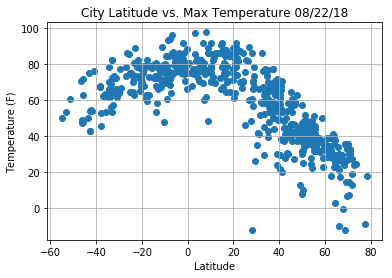

In [67]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp_max"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature 08/22/18")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

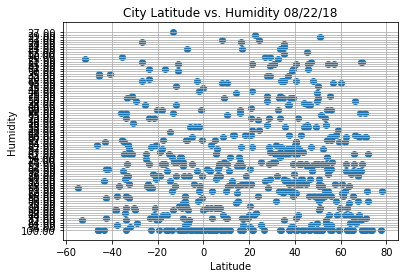

In [113]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity 08/22/18")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

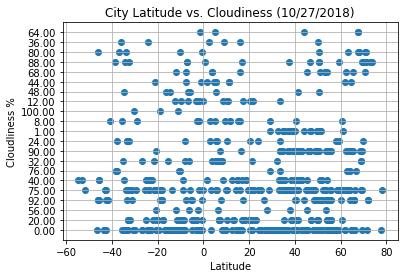

In [88]:
plt.scatter(weather_data["lat"], weather_data["clouds"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (10/27/2018)")
plt.ylabel("Cloudliness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudlinessInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

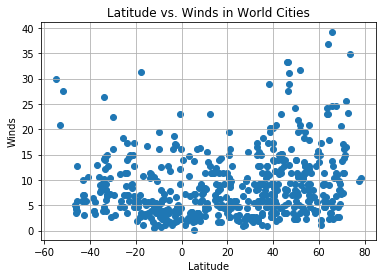

In [63]:
plt.scatter(weather_data["lat"], weather_data["winds"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (10/27/2018)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindInWorldCities.png")

# Show plot
plt.show()

In [65]:
# Save as a csv
citydata_pd.to_csv("weather_data.csv", encoding="utf-8", index=False)